# 課題6: ディープラーニングのモデルを構築しよう

今回の課題では手書き数字の認識を、CNNを用いて行います。ただし本課題では、レッスン本編で用いたscikit-learnのものではなく、Kerasのデータセットに含まれている、より大きいサイズの手書き数字データで課題を進めていただきます。

下記にKerasから手書き数字のデータセットをダウンロードするコードが記載されています。このデータを用いてディープラーニングのモデルを構築してください。

今までのレッスンで学んだ内容を踏まえ、各セルにコードを埋めていってください。

（※`変更しないでください`と書かれたセルには、コードの追記変更をしないでください）

## 1. ライブラリのimport

In [2]:
# （変更しないでください）

# 必要なライブラリのimport
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# TensorFlow
import tensorflow as tf

# データの分割
from sklearn.model_selection import train_test_split

# DataFrameですべての列を表示する設定
pd.options.display.max_columns = None

## 2. データの読み込み

Kerasのデータセットは、あらかじめTraining setとTest setに分けられています。戻り値はタプルで取得できます。

In [3]:
# Kerasに添付されている手書き数字のデータセットをダウンロードして読み込む
# （変更しないでください）
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## 3. データの確認

In [4]:
# X_train, Y_train, X_test, Y_testの形状を確認
print("X_train:", X_train.shape)
print("Y_train:", Y_train.shape)
print("X_test :", X_test.shape)
print("Y_test :", Y_test.shape)

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test : (10000, 28, 28)
Y_test : (10000,)


In [5]:
# X_trainの先頭1行を表示
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
# Y_trainの先頭1行を表示
Y_train[0]

np.uint8(5)

データセットを可視化して表示します。

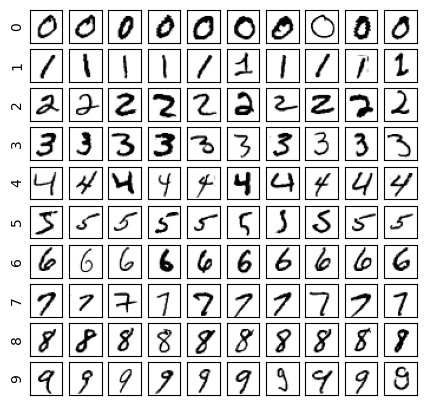

In [7]:
# （変更しないでください）

# 「数字:空のリスト」の辞書を作成する
images = {label: [] for label in range(0,10)}

# 総イメージ数
image_count = 0

# それぞれの数字のリストに、説明変数をappendしていく
for i in range(0, len(X_train)):
    if len(images[Y_train[i]]) < 10:
        images[Y_train[i]].append(X_train[i])
        image_count += 1
        if image_count == 100:
            break

# 10行10列にグラフを分割
fig, ax = plt.subplots(10, 10, figsize=(5, 5))

for i in range(10):
    # ラベル
    ax[i, 0].set_ylabel(i)

    for j in range(10):
        # 行=i、列=jの位置に画像を描画する
        ax[i, j].imshow(images[i][j].reshape(28, 28), cmap='Greys')

        # 目盛を表示しない設定
        ax[i, j].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

plt.show()

## 4. データの前処理

In [8]:
# len関数を使い、X_trainを(X_trainの長さ, 28, 28, 1)にreshapeしてX_train2に代入
X_train2 = X_train.reshape(len(X_train), 28, 28, 1)

# len関数を使い、X_testを(X_testの長さ, 28, 28, 1)にreshapeしてX_test2に代入
X_test2 = X_test.reshape(len(X_test), 28, 28, 1)

In [9]:
# to_categoricalを使い、Y_trainをカテゴリー変数に展開してY_train2に代入
from tensorflow.keras.utils import to_categorical
Y_train2 = to_categorical(Y_train)
# to_categoricalを使い、Y_testをカテゴリー変数に展開してY_test2に代入
Y_test2 = to_categorical(Y_test)

In [10]:
# X_train2, Y_train2, X_test2, Y_test2の形状を確認
print("X_train2:", X_train2.shape)
print("Y_train2:", Y_train2.shape)
print("X_test2 :", X_test2.shape)
print("Y_test2 :", Y_test2.shape)

X_train2: (60000, 28, 28, 1)
Y_train2: (60000, 10)
X_test2 : (10000, 28, 28, 1)
Y_test2 : (10000, 10)


In [11]:
# train_test_splitを使い、学習データと検証データに7:3（検証データが3割）で分割する
# （詳細：データ(X_train2、Y_train2)を「X_train2, X_valid2, Y_train2, Y_valid2」に分割）
X_train2, X_valid2, Y_train2, Y_valid2 = train_test_split(
    X_train2, Y_train2, test_size=0.3, random_state=0
)

In [12]:
# X_train2, Y_train2, X_valid2, Y_valid2, X_test2, Y_test2の形状を確認
print("X_train2:", X_train2.shape)
print("Y_train2:", Y_train2.shape)

print("X_valid2:", X_valid2.shape)
print("Y_valid2:", Y_valid2.shape)

print("X_test2 :", X_test2.shape)
print("Y_test2 :", Y_test2.shape)

X_train2: (42000, 28, 28, 1)
Y_train2: (42000, 10)
X_valid2: (18000, 28, 28, 1)
Y_valid2: (18000, 10)
X_test2 : (10000, 28, 28, 1)
Y_test2 : (10000, 10)


## 5. モデルの構築

Kerasを使ってモデルを構築してみましょう。以下を条件とします：

- CNN(Conv2D)を使うこと
- 正解率(accuracy)が50%以上であること

場合によっては、学習にものすごく時間がかかる場合もあります。適宜、パラメータ数を調整して行なってください。

In [13]:
# （モデルの初期化から構築までのコードを、このセル以下に記述してください）
# モデル構築（CNN + Conv2D）

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# 畳み込み層1
model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        activation="relu",
        input_shape=(28, 28, 1)
    )
)
model.add(MaxPooling2D(pool_size=(2, 2)))

# 畳み込み層2
model.add(
    Conv2D(
        filters=64,
        kernel_size=(3, 3),
        activation="relu"
    )
)
model.add(MaxPooling2D(pool_size=(2, 2)))

# 全結合層につなぐためにフラット化
model.add(Flatten())

# 全結合層
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))  # 過学習抑制用（必要に応じて調整）

# 出力層（0〜9の10クラス分類）
model.add(Dense(10, activation="softmax"))

# モデルのコンパイル
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

c:\Users\chika\Downloads\aidev\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# モデルの構造を表示
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
%%time
# 学習の実施(ものすごく時間がかかる場合もあります)
import time

start = time.time()   # 計測開始

history = model.fit(
    X_train2, Y_train2,
    epochs=5,           # 必要に応じて増減
    batch_size=128,
    validation_data=(X_valid2, Y_valid2),
    verbose=1
)

end = time.time()     # 計測終了
print("学習時間:", end - start, "秒")

Epoch 1/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8016 - loss: 1.1655 - val_accuracy: 0.9682 - val_loss: 0.1118
Epoch 2/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9392 - loss: 0.2073 - val_accuracy: 0.9774 - val_loss: 0.0769
Epoch 3/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step - accuracy: 0.9574 - loss: 0.1468 - val_accuracy: 0.9807 - val_loss: 0.0708
Epoch 4/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9667 - loss: 0.1120 - val_accuracy: 0.9812 - val_loss: 0.0665
Epoch 5/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.9728 - loss: 0.0906 - val_accuracy: 0.9836 - val_loss: 0.0577
学習時間: 56.152677059173584 秒
CPU times: total: 2min 41s
Wall time: 56.2 s


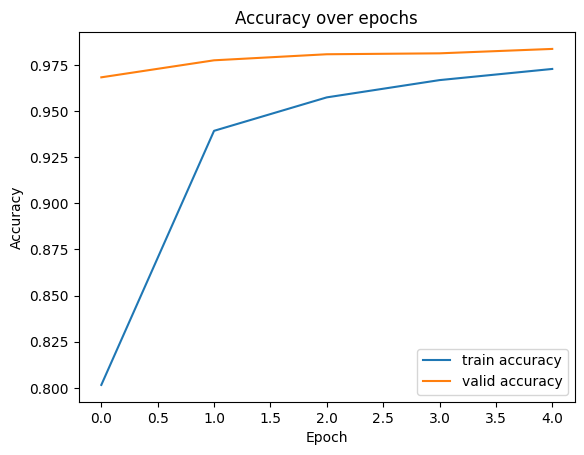

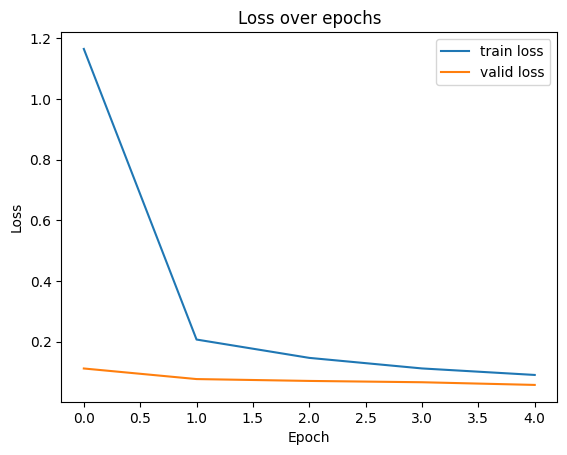

In [17]:
# 学習過程をグラフ表示
# Accuracy の推移
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='valid accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss の推移
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
# predictを使い、X_test2をもとに予測した結果を、
# カテゴリー変数へ復元してY_pred2に代入

# 予測（確率ベクトル）
Y_pred_prob = model.predict(X_test2)

# カテゴリー変数（0〜9）へ復元
Y_pred2 = Y_pred_prob.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [19]:
# Y_test2もカテゴリー変数へ復元して、Y_test2_ に代入
Y_test2_ = Y_test2.argmax(axis=1)

In [20]:
# classification_reportを使い、モデルの評価を実施
from sklearn.metrics import classification_report

# モデルの評価（予測 vs 正解）
print(classification_report(Y_test2_, Y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.96      0.99      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

